In [1]:
import pandas as pd
Bmarket = pd.read_csv('C:\Users\shiyan\Documents\Bank-additional-full.csv', sep=';')
Bmarket.shape

(41188, 21)

In [2]:
# backup first  this cell just run one time
BK_Bmarket= Bmarket.copy()
# drop the highly correlate column 'duration'

import numpy as np
# drop the column duration for all the study
Bmarket.drop('duration', axis = 1, inplace = True)
# change the response variable 
Bmarket.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
Bmarket.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# tree_based methods need to encoding categorical variables
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#job encode
#le.fit(Bmarket['job'])
#jobcode = le.transform(Bmarket['job']) 

i = 0
for col in ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']:
        le.fit(Bmarket[col])
        print (i)
        Bmarket.ix[:,col+str(i)] =le.transform(Bmarket[col])
        i = i + 1
        print (i)
#maritalcode = le.transform(Bmarket['marital']) 
# education encode
#le.fit(Bmarket[''])
#jobcode = le.transform(Bmarket['job']) 
#print (i)
Bmarket.head(2)


0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,marital1,education2,default3,housing4,loan5,contact6,month7,day_of_week8,poutcome9,y10
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,6,1,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,3,1,0,0,1,6,1,1,0


In [7]:
Bmarket.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'campaign', u'pdays',
       u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y', u'job0',
       u'marital1', u'education2', u'default3', u'housing4', u'loan5',
       u'contact6', u'month7', u'day_of_week8', u'poutcome9', u'y10'],
      dtype='object')

In [8]:
## reformat the data frame just run once
Bmarket.drop(Bmarket.columns[[1,2,3,4,5,6,7,8,9,13,19]], axis = 1, inplace = True)
Bmarket.head(2)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job0,marital1,education2,default3,housing4,loan5,contact6,month7,day_of_week8,poutcome9,y10
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,3,1,0,0,0,0,1,6,1,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,1,0,0,1,6,1,1,0


In [9]:
# spliting the dataset to train and test
#split the data set into train and test at 80/20
import sklearn
import sklearn.cross_validation
train, test = sklearn.cross_validation.train_test_split(Bmarket, train_size = 0.8)
# varify the train and test
print (len(train.index))
print (len(test.index))
x_train = train.ix[:, train.columns != 'y10']
x_test = test.ix[:, test.columns != 'y10']
y_test = test['y10']
y_train = train['y10']

32950
8238


In [10]:
# building decision tree model
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT1 = DT.fit(x_train, y_train)

In [11]:
print (DT1.score(x_train,y_train))  # score is 0.99344
print (DT1.score(x_test, y_test))   # score is 0.8377  over fitting

0.995265553869
0.838674435543


In [104]:
# Since DecisionTreeClassifier does not support prune in python
#output the data for R:
Bmarket.to_csv('BmarketForR.csv', index = False)

In [13]:
# starting RandomForest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=20, n_jobs=7, )

In [14]:
# perform model evaluation
# build model evaluation function
from __future__ import print_function
import sklearn.metrics
import time

def evaluate_model(clf):
    """Scores a model using log loss with the created train and test sets."""
    start = time.time()
    clf.fit(x_train, y_train)
    train_loss = sklearn.metrics.log_loss(y_train, clf.predict_proba(x_train))
    test_loss = sklearn.metrics.log_loss(y_test, clf.predict_proba(x_test))
    print("Train score:", train_loss)
    print("Test score:", test_loss)
    print("Total time:", time.time() - start)
    print()
    return test_loss

In [15]:
# test run on evaluation the model
evaluate_model(rf)

Train score: 0.104902500819
Test score: 0.287045190667
Total time: 3.1289999485



0.28704519066729123

In [74]:
print(len(x_train.index))
print(len(y_train))

32950
32950


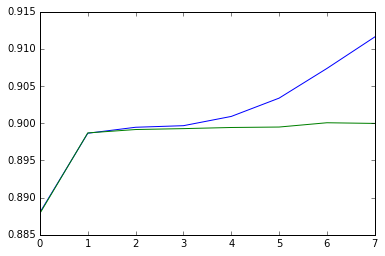

In [16]:
import sklearn.cross_validation
import numpy as np
import sklearn.learning_curve
import matplotlib.pyplot as plt
%matplotlib inline
max_depths = [1,2,3,4,5,6,7,8] # FILL ME IN
train_scores, test_scores = sklearn.learning_curve.validation_curve(
    RandomForestClassifier(), x_train, y_train, 'max_depth', max_depths)
plt.plot(np.mean(train_scores, axis=1), label='Train')
plt.plot(np.mean(test_scores, axis=1), label='Test')
# based on the plot the max_depth = 2 or 3

In [23]:
# grid search for the best params
from sklearn.grid_search import GridSearchCV
params = {'class_weight' : [{1:4},{1:3},{1:2}]}
grid = GridSearchCV(RandomForestClassifier(max_depth=4, n_estimators = 1000,max_features = 'log2'), 
                    params, scoring='log_loss')
evaluate_model(grid)

Train score: 0.299543551654
Test score: 0.299561308708
Total time: 241.877999783



0.29956130870835507

In [24]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight={1: 2}, criterion='gini',
            max_depth=4, max_features='log2', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
rf_MD = RandomForestClassifier(n_estimators=1000, max_depth=4, n_jobs=1,max_features='log2',class_weight={1:6} )

In [36]:
rf_MD.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={1: 6}, criterion='gini',
            max_depth=4, max_features='log2', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
from  sklearn.metrics import classification_report
rf_MD.score(x_train,y_train)  # 10000 trees: 0.89885  100 trees: 0.89875, 100000: 0.89970


0.84003034901365703

In [38]:
rf.Predict = rf_MD.predict(x_train)
target_names = ['class 0','class 1']
print (classification_report(y_train,rf.Predict, target_names = target_names))


             precision    recall  f1-score   support

    class 0       0.95      0.87      0.91     29224
    class 1       0.37      0.62      0.47      3726

avg / total       0.88      0.84      0.86     32950



In [39]:
rf.PredictTest = rf_MD.predict(x_test)
target_names = ['class 0','class 1']
print (classification_report(y_test,rf.PredictTest, target_names = target_names))
# conclusion: 
#the best parameter:n_estimators=1000, max_depth=4, n_jobs=1,max_features='log2',class_weight={1:6} 

             precision    recall  f1-score   support

    class 0       0.95      0.87      0.91      7324
    class 1       0.37      0.61      0.46       914

avg / total       0.88      0.84      0.86      8238



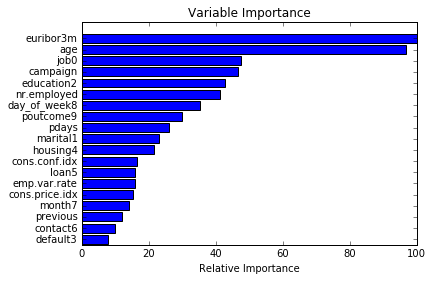

In [48]:
feature_importance = rf.feature_importances_
#make importances relative to max importance
feature_importance = 100.0*(feature_importance / feature_importance.max())
sorted_idx =np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos,Bmarket.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [49]:
Bmarket.head(2)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job0,marital1,education2,default3,housing4,loan5,contact6,month7,day_of_week8,poutcome9,y10
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,3,1,0,0,0,0,1,6,1,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,1,0,0,1,6,1,1,0


In [40]:
# building grading boosting model default n_estimatoers = 100
from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier()
evaluate_model(gbt)

Train score: 0.266638472454
Test score: 0.270037136845
Total time: 4.37699985504



0.27003713684498165

In [44]:
gbt.n_estimators  # default number

100

In [45]:
def plot_gbt_learning(gbt):
    test_score = np.empty(len(gbt.estimators_))
    train_score = np.empty(len(gbt.estimators_))
    for i, pred in enumerate(gbt.staged_predict_proba(x_test)):
        test_score[i] = sklearn.metrics.log_loss(y_test, pred)
    for i, pred in enumerate(gbt.staged_predict_proba(x_train)):
        train_score[i] = sklearn.metrics.log_loss(y_train, pred)
    plt.figure(figsize=(8,6))
    plt.plot(np.arange(gbt.n_estimators) + 1, test_score, label='Test') 
    plt.plot(np.arange(gbt.n_estimators) + 1, train_score, label='Train')

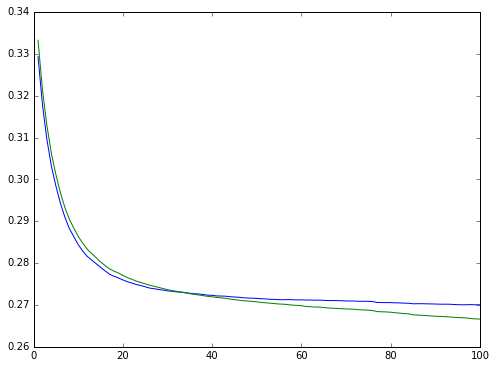

In [46]:
plot_gbt_learning(gbt)

Train score: 0.256413371071
Test score: 0.267923209087
Total time: 5.55900001526



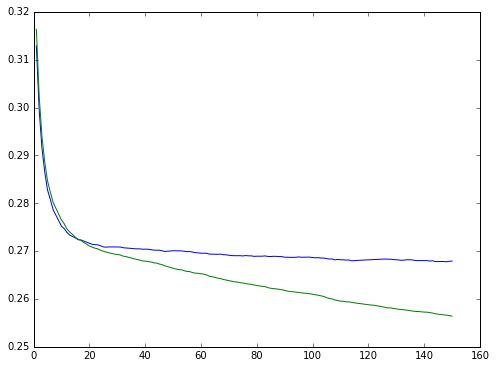

In [47]:
# This shows overfittin
gbt = GradientBoostingClassifier(n_estimators=150, learning_rate=0.2)
evaluate_model(gbt)     # 500 estimators: 0.253 for Train, 0.27608 for test
plot_gbt_learning(gbt)

In [52]:
# grid search for the best parameters
params = {'max_depth' : [4,5], 'n_estimators':[60,80, 100],'learning_rate': [0.1,0.15], 
          'subsample': [0.5,1.0]}
grid = GridSearchCV(GradientBoostingClassifier(), params, scoring='log_loss')
evaluate_model(grid)
grid.grid_scores_

Train score: 0.263757424092
Test score: 0.268916021614
Total time: 245.854000092



[mean: -0.27367, std: 0.00192, params: {'n_estimators': 60, 'subsample': 0.5, 'learning_rate': 0.1, 'max_depth': 4},
 mean: -0.27243, std: 0.00158, params: {'n_estimators': 60, 'subsample': 1.0, 'learning_rate': 0.1, 'max_depth': 4},
 mean: -0.27422, std: 0.00152, params: {'n_estimators': 80, 'subsample': 0.5, 'learning_rate': 0.1, 'max_depth': 4},
 mean: -0.27258, std: 0.00173, params: {'n_estimators': 80, 'subsample': 1.0, 'learning_rate': 0.1, 'max_depth': 4},
 mean: -0.27386, std: 0.00200, params: {'n_estimators': 100, 'subsample': 0.5, 'learning_rate': 0.1, 'max_depth': 4},
 mean: -0.27285, std: 0.00186, params: {'n_estimators': 100, 'subsample': 1.0, 'learning_rate': 0.1, 'max_depth': 4},
 mean: -0.27383, std: 0.00129, params: {'n_estimators': 60, 'subsample': 0.5, 'learning_rate': 0.1, 'max_depth': 5},
 mean: -0.27267, std: 0.00136, params: {'n_estimators': 60, 'subsample': 1.0, 'learning_rate': 0.1, 'max_depth': 5},
 mean: -0.27428, std: 0.00202, params: {'n_estimators': 80, 's

In [54]:
grid.best_estimator_

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=4, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [85]:
params = {'max_depth' : 4, 'n_estimators': 60,'learning_rate': 0.1}
gbt = GradientBoostingClassifier(**params)
sample_weight = map(lambda x: 1 if x == 0 else 7, y_train)
#gbt.fit(x_train,y_train)
gbt.fit(x_train,y_train, sample_weight = sample_weight)
gbt.score(x_train,y_train)



0.85271623672230656

In [86]:
gbt.Predict = gbt.predict(x_train)
target_names = ['class 0','class 1']
print (classification_report(y_train,gbt.Predict, target_names = target_names))

             precision    recall  f1-score   support

    class 0       0.95      0.88      0.91     29224
    class 1       0.40      0.63      0.49      3726

avg / total       0.89      0.85      0.87     32950



In [87]:
gbt.Predict = gbt.predict(x_test)
target_names = ['class 0','class 1']
print (classification_report(y_test,gbt.Predict, target_names = target_names))

             precision    recall  f1-score   support

    class 0       0.95      0.88      0.91      7324
    class 1       0.39      0.63      0.48       914

avg / total       0.89      0.85      0.86      8238



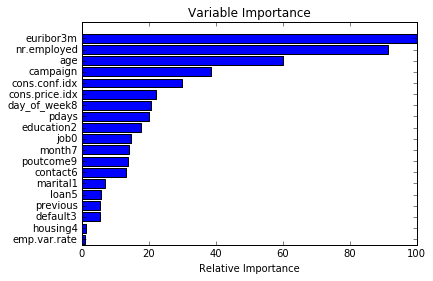

In [88]:
feature_importance = gbt.feature_importances_
#make importances relative to max importance
feature_importance = 100.0*(feature_importance / feature_importance.max())
sorted_idx =np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos,Bmarket.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [93]:
# Support Vector Classification
from sklearn.svm import SVC
clf=SVC()
clf.fit(x_train,y_train)




SVC(C=1.0, cache_size=200, class_weight={1: 9}, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.01, verbose=False)

In [99]:
SVC(C=1.0, class_weight = {1:8}, coef0=0.0,
   decision_function_shape = None,degree = 3, gamma = 'auto', kernel = 'poly',
   max_iter = -1, probability = True, random_state= None, shrinking=True,
   tol = 0.01, verbose = False)

SVC(C=1.0, cache_size=200, class_weight={1: 8}, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.01, verbose=False)

In [100]:
# predcit on train set
PredictFromSVC = clf.predict(x_train)
PredictOnTest = clf.predict(x_test)


In [101]:
target_names = ['class 0','class 1']
print (classification_report(y_train,PredictFromSVC, target_names = target_names))
print (classification_report(y_test,PredictOnTest, target_names = target_names))

             precision    recall  f1-score   support

    class 0       0.93      1.00      0.96     29224
    class 1       0.94      0.37      0.53      3726

avg / total       0.93      0.93      0.91     32950

             precision    recall  f1-score   support

    class 0       0.91      0.98      0.94      7324
    class 1       0.57      0.18      0.27       914

avg / total       0.87      0.89      0.87      8238



In [ ]:
# the above results seems overfitting
params = {'C' : [0.5, 1.0, 1.5], 'kernel':['linear','poly','rbf','sigmoid'],'degree': [2,3], 
          'coef0': [0,1.0], 'class_weight' :[{1:9},{1:8}]}
grid = GridSearchCV(SVC(probability = True), params, scoring='log_loss')
evaluate_model(grid)
grid.grid_scores_